In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import numpy as np
import statistics
import ast
from matplotlib.lines import Line2D


In [2]:
metrics_dict = {}
graph_dict = {}

def run_analysis(experiment_folder):
    
    if "base" in experiment_folder:
        label = "Base Function, c = 1"
        color = 'darkorange'
    
    elif "log" in experiment_folder:
        label = "Log Function, c = 0.25"
        color = 'cornflowerblue'
        
    elif "sigmoid" in experiment_folder:
        label = "Sigmoid Function, c = 0.25"
        color = 'limegreen'
    
    else:
        color = 'red'
        
    df = pd.read_csv(experiment_folder + 'El Farol final_experiment-table.csv')
    df = df.sort_values(by = ['[run number]', '[step]'], ignore_index = True)

    #pd.set_option("min_rows", 2500)
    pd.set_option("max_rows", 2500)

    #print(df[df['[run number]']  == 1])
    
    num_agents = 400

    metrics_dict[experiment_folder] = {}
    metrics_dict[experiment_folder]['attendance'] = []
    metrics_dict[experiment_folder]['num_agents_one_roll'] = []
    metrics_dict[experiment_folder]['num_agents_two_roll'] = []
    metrics_dict[experiment_folder]['overcrowded_agent'] = []
    metrics_dict[experiment_folder]['mean_score'] = []
    metrics_dict[experiment_folder]['min_all_scores'] = []
    metrics_dict[experiment_folder]['max_all_scores'] = []
    metrics_dict[experiment_folder]['unique_scores'] = []
    metrics_dict[experiment_folder]['mean_epsilon'] = []
    metrics_dict[experiment_folder]['min_epsilon'] = []
    metrics_dict[experiment_folder]['max_epsilon'] = []
    metrics_dict[experiment_folder]['unique_epsilons'] = []
    metrics_dict[experiment_folder]['num_overcrowded_timeslots'] = []
    metrics_dict[experiment_folder]['count_swapped_one_roll'] = []
    metrics_dict[experiment_folder]['count_swapped_two_roll'] = []
    metrics_dict[experiment_folder]['exploitation_count'] = []

    convergence_count = 0
    convergence_steps = []

    for run_number in df['[run number]'].unique():

        metrics_dict[experiment_folder]['attendance'].append(list(df[df['[run number]'] == run_number]['attendance']))
        metrics_dict[experiment_folder]['num_agents_one_roll'].append(list(df[df['[run number]'] == run_number]['num-agents-one-roll']))
        metrics_dict[experiment_folder]['num_agents_two_roll'].append(list(df[df['[run number]'] == run_number]['num-agents-two-roll']))
        metrics_dict[experiment_folder]['overcrowded_agent'].append(list(df[df['[run number]'] == run_number]['overcrowded-agent']))
        metrics_dict[experiment_folder]['mean_score'].append(list(df[df['[run number]'] == run_number]['mean-score']))
        metrics_dict[experiment_folder]['min_all_scores'].append(list(df[df['[run number]'] == run_number]['min-all-scores']))
        metrics_dict[experiment_folder]['max_all_scores'].append(list(df[df['[run number]'] == run_number]['max-all-scores']))
        metrics_dict[experiment_folder]['unique_scores'].append(list(df[df['[run number]'] == run_number]['unique-scores']))
        metrics_dict[experiment_folder]['mean_epsilon'].append([1 if x>1 else x for x in list(df[df['[run number]'] == run_number]['mean-epsilon'])])
        metrics_dict[experiment_folder]['min_epsilon'].append([1 if x>1 else x for x in list(df[df['[run number]'] == run_number]['min-epsilon'])])
        metrics_dict[experiment_folder]['max_epsilon'].append([1 if x>1 else x for x in list(df[df['[run number]'] == run_number]['max-epsilon'])])
        metrics_dict[experiment_folder]['unique_epsilons'].append(list(df[df['[run number]'] == run_number]['unique-epsilons']))
        metrics_dict[experiment_folder]['num_overcrowded_timeslots'].append(list(df[df['[run number]'] == run_number]['num-overcrowded-timeslots']))
        metrics_dict[experiment_folder]['count_swapped_one_roll'].append(list(df[df['[run number]'] == run_number]['count-swapped-one-roll']))
        metrics_dict[experiment_folder]['count_swapped_two_roll'].append(list(df[df['[run number]'] == run_number]['count-swapped-two-roll']))
        metrics_dict[experiment_folder]['exploitation_count'].append(list(df[df['[run number]'] == run_number]['exploitation-count']))
        
        list_ = list(df[ df['[run number]'] == run_number ]['attendance'])
        from_index = 0
        flag_set = False
        for i in range(len(list_)):

            if list_[i] <= 17 and flag_set == False:

                from_index = i
                flag_set = True

            elif list_[i] > 17:

                from_index = i
                flag_set = False

        convergence_steps.append(from_index)

        if from_index < len(df[ df['[run number]'] == run_number ]):
            convergence_count += 1
    
    #print("----------------------------- CONVERGENCE METRICS -----------------------------")
    #print("Convergence count: " +str(convergence_count))
    #print("Avg Convergence steps mean (in weeks): "+str(round(statistics.mean(convergence_steps)/112, 2)))
    
    #print("----------------------------- CONVERGENCE METRICS -----------------------------")
    #print("Convergence count: " +str(convergence_count))
    #print("Avg Convergence steps mean: "+str(statistics.mean(convergence_steps)))
    #print("Avg Convergence steps std dev: "+str(statistics.stdev(convergence_steps)))
    #print("Avg Convergence steps median: "+str(statistics.median(convergence_steps)))
    #print("Avg Convergence steps mode: "+str(statistics.mode(convergence_steps)))
    
    
    print("-------------------------------------------------------------------------------")


    graph_dict[experiment_folder] = {}
    for key in metrics_dict[experiment_folder].keys():
        #print(key)

        graph_dict[experiment_folder][key] = {}
        graph_dict[experiment_folder][key]['avg_across_runs'] = []

        # length of first list same as all others
        list_length = len(metrics_dict[experiment_folder][key][0])

        for i in range(list_length):

            sum_ = 0
            avg_ = 0

            for metric_list in metrics_dict[experiment_folder][key]:

                sum_ += metric_list[i]

            avg_ = sum_ / len(metrics_dict[experiment_folder][key])
            graph_dict[experiment_folder][key]['avg_across_runs'].append(avg_)

        graph_dict[experiment_folder][key]['proportion_to_num_agents'] = [val_ / num_agents for val_ in graph_dict[experiment_folder][key]['avg_across_runs']]
        graph_dict[experiment_folder][key]['first_week_val'] = graph_dict[experiment_folder][key]['avg_across_runs'][113]
        graph_dict[experiment_folder][key]['final_week_val'] = graph_dict[experiment_folder][key]['avg_across_runs'][4000]

        
    graph_dict[experiment_folder]['mean_epsilon']['avg_across_runs'] = [1 if x>1 else x for x in graph_dict[experiment_folder]['mean_epsilon']['avg_across_runs']]
    graph_dict[experiment_folder]['min_epsilon']['avg_across_runs'] = [1 if x>1 else x for x in graph_dict[experiment_folder]['min_epsilon']['avg_across_runs']]
    graph_dict[experiment_folder]['max_epsilon']['avg_across_runs'] = [1 if x>1 else x for x in graph_dict[experiment_folder]['max_epsilon']['avg_across_runs']]

    initial_index = 113
    step_index = 112
    for key in graph_dict[experiment_folder].keys():

        if key == 'attendance':

            plt.figure(figsize = (15,7))
            plt.plot(graph_dict[experiment_folder][key]['avg_across_runs'][1:], color=color)
            x = np.linspace(0,4000)
            y = 15+ (0*x)
            plt.plot(x, y, '-r', label='overcrowding threshold')

            plt.xlabel("Number of Time Slots")
            plt.ylabel("Attendance")

            #plt.title("Average "+key+" over time slots")
            plt.grid()
            plt.savefig(experiment_folder+'avg_attendance.png')
            plt.show()

        elif key == 'num_agents_one_roll':

            avg_one_roll_df = pd.Series(graph_dict[experiment_folder]['num_agents_one_roll']['avg_across_runs'])
            avg_two_roll_df = pd.Series(graph_dict[experiment_folder]['num_agents_two_roll']['avg_across_runs'])

            one_roll_week_update = []
            for i in range(initial_index, len(avg_one_roll_df), 112):
                #print(avg_epsilon_df[i])
                one_roll_week_update.append(avg_one_roll_df[i])

            two_roll_week_update = []
            for i in range(initial_index, len(avg_two_roll_df), 112):
                #print(avg_epsilon_df[i])
                two_roll_week_update.append(avg_two_roll_df[i])

            avg_one_roll_df = pd.Series(one_roll_week_update)
            avg_two_roll_df = pd.Series(two_roll_week_update)
            
            avg_one_roll_df.index = avg_one_roll_df.index + 1
            avg_two_roll_df.index = avg_two_roll_df.index + 1

            plt.figure(figsize = (14,7))
            plt.plot(avg_one_roll_df, label = "Switched time slots")
            plt.plot(avg_two_roll_df, label = "Switched time slots and trip configurations")
            #plt.title("Average Number of Agents Switching Slots over each week")
            plt.xlabel("Number of weeks")
            plt.ylabel("Number of agents")
            plt.xticks(avg_one_roll_df.index)
            plt.legend()
            plt.grid()
            plt.savefig(experiment_folder+'num_agents_switching_weekly.png')
            plt.show()
            
            print()
            print("Num agents switching One roll")
            print("First week val: " + str(graph_dict[experiment_folder]["num_agents_one_roll"]["first_week_val"]))
            print("Final week val: " + str(graph_dict[experiment_folder]["num_agents_one_roll"]["final_week_val"]))
            print()

            print("Num agents switching two roll")
            print("First week val: " + str(graph_dict[experiment_folder]["num_agents_two_roll"]["first_week_val"]))
            print("Final week val: " + str(graph_dict[experiment_folder]["num_agents_two_roll"]["final_week_val"]))
            print()


        elif key == 'num_agents_two_roll':
            print("")

        elif key == "mean_score":

            avg_mean_score_df = pd.Series(graph_dict[experiment_folder]['mean_score']['avg_across_runs'])
            avg_min_score_df = pd.Series(graph_dict[experiment_folder]['min_all_scores']['avg_across_runs'])
            avg_max_score_df = pd.Series(graph_dict[experiment_folder]['max_all_scores']['avg_across_runs'])


            mean_score_week_update = []
            for i in range(initial_index, len(avg_mean_score_df), 112):
                #print(avg_epsilon_df[i])
                mean_score_week_update.append(avg_mean_score_df[i])

            min_score_week_update = []
            for i in range(initial_index, len(avg_min_score_df), 112):
                #print(avg_epsilon_df[i])
                min_score_week_update.append(avg_min_score_df[i])

            max_score_week_update = []
            for i in range(initial_index, len(avg_max_score_df), 112):
                #print(avg_epsilon_df[i])
                max_score_week_update.append(avg_max_score_df[i])


            avg_mean_score_df =  pd.Series(mean_score_week_update)
            avg_min_score_df = pd.Series(min_score_week_update)
            avg_max_score_df = pd.Series(max_score_week_update)

            avg_mean_score_df.index = avg_mean_score_df.index + 1
            avg_min_score_df.index = avg_min_score_df.index + 1
            avg_max_score_df.index = avg_max_score_df.index + 1
            
            plt.figure(figsize = (14,7))
            plt.plot(avg_mean_score_df, label = "Mean Score")
            plt.plot(avg_min_score_df, label = "Lowest Score")
            plt.plot(avg_max_score_df, label = "Highest Score")
            #plt.title("Mean, Lowest and Highest Scores for all agents averaged over all iterations")
            plt.xlabel("Number of weeks")
            plt.ylabel("Score")
            plt.xticks(avg_mean_score_df.index)
            plt.legend()
            plt.grid()
            plt.savefig(experiment_folder+'scores.png')
            plt.show()

            print()
            print("Mean Score")
            print("First week val: " + str(graph_dict[experiment_folder]["mean_score"]["first_week_val"]))
            print("Final week val: " + str(graph_dict[experiment_folder]["mean_score"]["final_week_val"]))
            print()

            print("Lowest Score")
            print("First week val: " + str(graph_dict[experiment_folder]["min_all_scores"]["first_week_val"]))
            print("Final week val: " + str(graph_dict[experiment_folder]["min_all_scores"]["final_week_val"]))
            print()

            print("Highest Score")
            print("First week val: " + str(graph_dict[experiment_folder]["max_all_scores"]["first_week_val"]))
            print("Final week val: " + str(graph_dict[experiment_folder]["max_all_scores"]["final_week_val"]))
            print()

        elif key ==  "min_all_scores":
            print("")

        elif key == "max_all_scores":
            print("")

        elif key == "mean_epsilon":

            avg_mean_epsilon_df = pd.Series(graph_dict[experiment_folder]['mean_epsilon']['avg_across_runs'])
            avg_min_epsilon_df = pd.Series(graph_dict[experiment_folder]['min_epsilon']['avg_across_runs'])
            avg_max_epsilon_df = pd.Series(graph_dict[experiment_folder]['max_epsilon']['avg_across_runs'])


            mean_epsilon_week_update = []
            for i in range(initial_index, len(avg_mean_epsilon_df), 112):
                #print(avg_epsilon_df[i])
                mean_epsilon_week_update.append(avg_mean_epsilon_df[i])

            min_epsilon_week_update = []
            for i in range(initial_index, len(avg_min_epsilon_df), 112):
                #print(avg_epsilon_df[i])
                min_epsilon_week_update.append(avg_min_epsilon_df[i])

            max_epsilon_week_update = []
            for i in range(initial_index, len(avg_max_epsilon_df), 112):
                #print(avg_epsilon_df[i])
                max_epsilon_week_update.append(avg_max_epsilon_df[i])


            avg_mean_epsilon_df =  pd.Series(mean_epsilon_week_update)
            avg_min_epsilon_df = pd.Series(min_epsilon_week_update)
            avg_max_epsilon_df = pd.Series(max_epsilon_week_update)
            
            avg_mean_epsilon_df.index = avg_mean_epsilon_df.index + 1
            avg_min_epsilon_df.index = avg_min_epsilon_df.index + 1
            avg_max_epsilon_df.index = avg_max_epsilon_df.index + 1

            plt.figure(figsize = (14,7))
            plt.plot(avg_mean_epsilon_df, label = "Mean Epsilon")
            plt.plot(avg_min_epsilon_df, label = "Lowest Epsilon")
            plt.plot(avg_max_epsilon_df, label = "Highest Epsilon")
            #plt.title("Mean, Lowest and Highest Epsilons for all agents averaged over all iterations")
            plt.xlabel("Number of weeks")
            plt.ylabel("Epsilon")
            plt.xticks(avg_mean_epsilon_df.index)
            plt.legend()
            plt.grid()
            plt.savefig(experiment_folder+'epsilons.png')
            plt.show()

            print()
            print("Mean Epsilon")
            print("First week val: " + str(graph_dict[experiment_folder]["mean_epsilon"]["first_week_val"]))
            print("Final week val: " + str(graph_dict[experiment_folder]["mean_epsilon"]["final_week_val"]))
            print()

            print("Lowest Epsilon")
            print("First week val: " + str(graph_dict[experiment_folder]["min_epsilon"]["first_week_val"]))
            print("Final week val: " + str(graph_dict[experiment_folder]["min_epsilon"]["final_week_val"]))
            print()

            print("Highest Epsilon")
            print("First week val: " + str(graph_dict[experiment_folder]["max_epsilon"]["first_week_val"]))
            print("Final week val: " + str(graph_dict[experiment_folder]["max_epsilon"]["final_week_val"]))
            print()
        
        elif key == "num_overcrowded_timeslots": 
            
            avg_df_timeslot = pd.Series(graph_dict[experiment_folder]['num_overcrowded_timeslots']['avg_across_runs'])
            avg_df_agent = pd.Series(graph_dict[experiment_folder]['overcrowded_agent']['avg_across_runs'])
            
            
            timeslot_week_update = []
            for i in range(initial_index, len(avg_df_timeslot), 112):
                timeslot_week_update.append(avg_df_timeslot[i])

            agent_week_update = []
            for i in range(initial_index, len(avg_df_agent), 112):
                agent_week_update.append(avg_df_agent[i])
                
                
            avg_df_timeslot = pd.Series(timeslot_week_update)
            avg_df_agent = pd.Series(agent_week_update)
            
            avg_df_timeslot.index = avg_df_timeslot.index + 1
            avg_df_agent.index = avg_df_agent.index + 1
            
            #avg_df_timeslot.plot(label="Timeslots", legend=True)
            #avg_df_agent.plot(secondary_y=True, label="Agents", legend=True)
            #plt.grid()
            
            
            plt.figure(figsize = (14,7))
            
            ax1 = plt.subplot()
            
            l1, = ax1.plot(avg_df_timeslot, color='cornflowerblue')
            ax2 = ax1.twinx()
            l2, = ax2.plot(avg_df_agent, color='darkorange')

            
            ax1.set_ylabel('Number of overcrowded timeslots', color='cornflowerblue')
            ax2.set_ylabel('Number of overcrowded agents', color='darkorange')
            
            plt.xlabel("Number of weeks")
            
            
            plt.xticks(avg_df_timeslot.index)
            plt.xlabel("Number of weeks")
            plt.legend([l1, l2], ["Number of overcrowded time slots", "Number of overcrowded agents"])
            plt.grid(True)
            plt.grid(axis = 'x')
            plt.savefig(experiment_folder+'overcrowded_agents_timeslots.png')
            plt.show()
            
        elif key ==  "min_epsilon":
            print("")

        elif key == "max_epsilon":
            print("")

        elif key == "count_swapped_one_roll":
            print("Count Swapped One Roll")
            print(graph_dict[experiment_folder][key]["first_week_val"])
            print(graph_dict[experiment_folder][key]["final_week_val"])

        elif key == "count_swapped_two_roll":
            print("Count Swapped Two Roll")
            print(graph_dict[experiment_folder][key]["first_week_val"])
            print(graph_dict[experiment_folder][key]["final_week_val"])
        

        else:

            title_ = ""
            y_label_ = ""

            if key == "overcrowded_agent":
                title_ = "Average number of overcrowded agents over each week"
                y_label_ = "Number of overcrowded agents"

            elif key == "mean_score":
                title_ = "Mean score each week for all agents averaged over all iterations"
                y_label_ = "Mean score"

            elif key == "min_all_scores":
                title_ = "Lowest score each week across all agents avearged over all iterations"
                y_label_ = "Lowest score"

            elif key == "max_all_scores":
                title_ = "Highest score each week across all agents avearged over all iterations"
                y_label_ = "Highest score"

            elif key == "unique_scores":
                title_ = "Number of unique scores each week avearged over all iterations"
                y_label_ = "Number of unique scores"

            elif key == "mean_epsilon":
                title_ = "Mean epsilon each week for all agents averaged over all iterations"
                y_label_ = "Mean epsilon"

            elif key == "min_epsilon":
                title_ = "Lowest epsilon each week across all agents avearged over all iterations"
                y_label_ = "Lowest epsilon"

            elif key == "max_epsilon":
                title_ = "Highest epsilon each week across all agents avearged over all iterations"
                y_label_ = "Highest epsilon"

            elif key == "unique_epsilons":
                title_ = "Number of unique epsilons each week avearged over all iterations"
                y_label_ = "Number of unique epsilons"

            elif key == "num_overcrowded_timeslots":
                title_ = "Number of overcrowded timeslots each week averaged over all iterations"
                y_label_ = "Number of overcrowded timeslots"


            avg_df = pd.Series(graph_dict[experiment_folder][key]['avg_across_runs'])

            week_update = []
            for i in range(initial_index, len(avg_df), 112):
                #print(avg_epsilon_df[i])
                week_update.append(avg_df[i])


            avg_df = pd.Series(week_update)
            
            avg_df.index = avg_df.index + 1

            plt.figure(figsize = (14,7))
            plt.plot(avg_df, color = color)
            #plt.title(title_)
            plt.xlabel("Number of weeks")
            plt.ylabel(y_label_)
            plt.xticks(avg_df.index)
            #plt.legend()
            plt.grid()
            plt.savefig(experiment_folder+key+'.png')
            plt.show()
            
            print()
            print(key)
            print("First week val: " + str(graph_dict[experiment_folder][key]["first_week_val"]))
            print("Final week val: " + str(graph_dict[experiment_folder][key]["final_week_val"]))
            print()
    
    convergence_steps.sort()
    plt.figure(figsize = (14,7))
    #plt.hist(convergence_steps, bins = 10, color = color)
    
    plt.hist(convergence_steps, weights=np.ones(len(convergence_steps)) / len(convergence_steps), bins = 10, color = color)

    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

    plt.xlabel("Number of Time Slots")
    plt.ylabel("Frequency Percentage (%)")
    #plt.title("Histogram of time taken for convergence")
    plt.grid()
    plt.savefig(experiment_folder+'convergence_histogram.png')
    plt.show()

-------------------------------------------------------------------------------


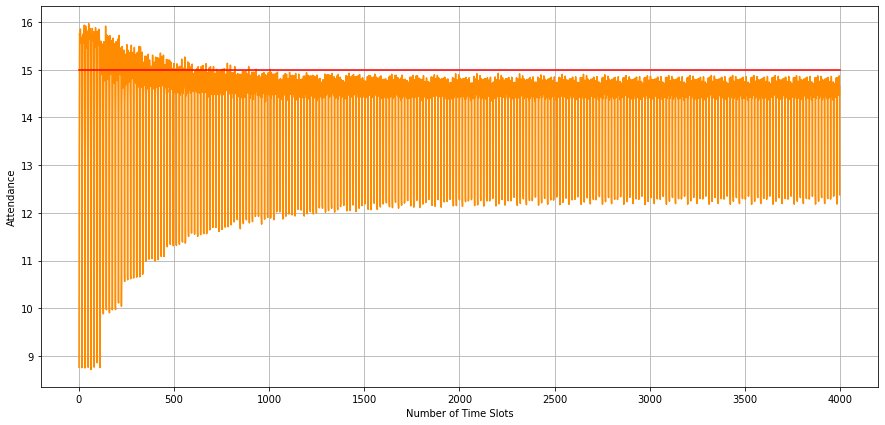

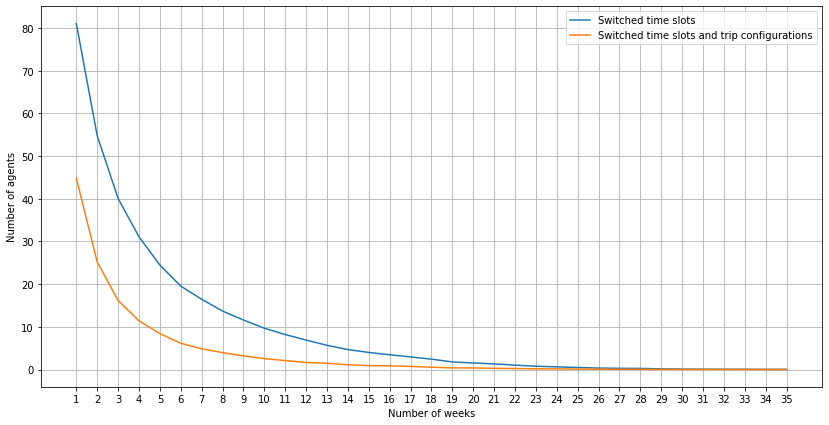


Num agents switching One roll
First week val: 81.031
Final week val: 0.039

Num agents switching two roll
First week val: 44.794
Final week val: 0.009




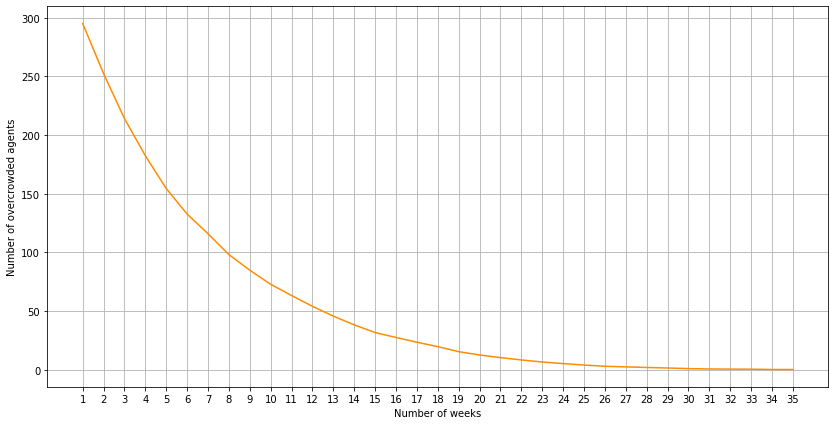


overcrowded_agent
First week val: 294.924
Final week val: 0.279



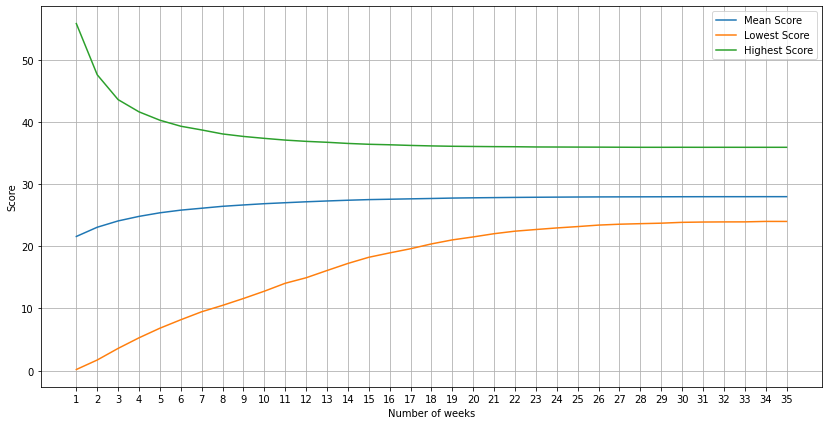


Mean Score
First week val: 21.59
Final week val: 27.99575

Lowest Score
First week val: 0.17720588235294105
Final week val: 24.00826303598356

Highest Score
First week val: 55.85417610983796
Final week val: 35.94084233576887





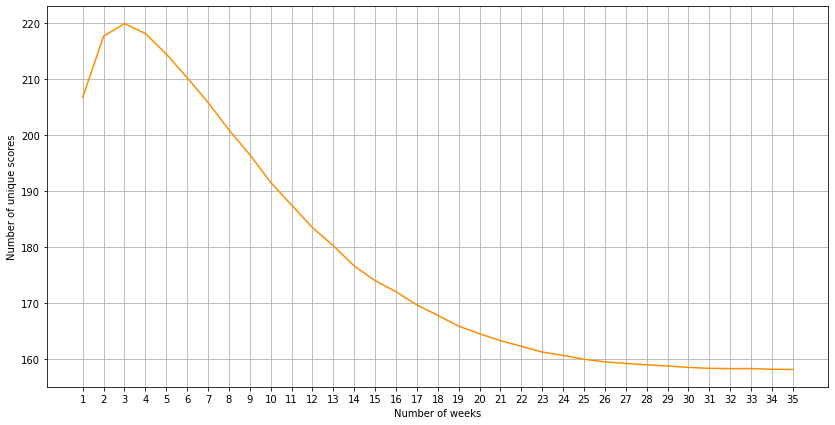


unique_scores
First week val: 206.727
Final week val: 158.216



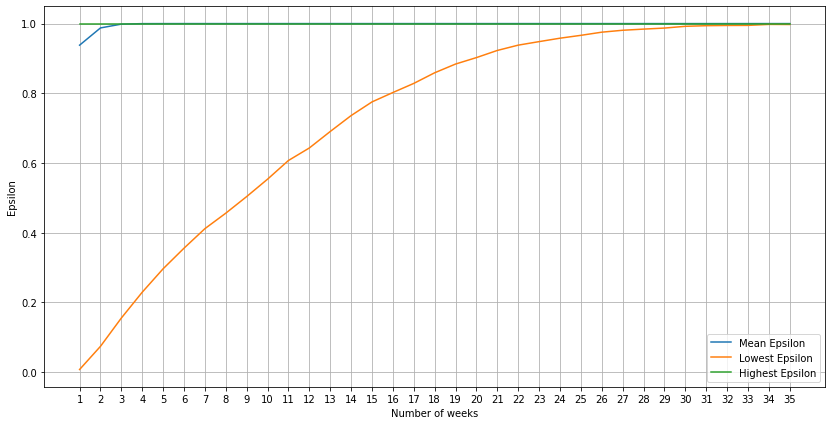


Mean Epsilon
First week val: 0.9380434782608668
Final week val: 1.0

Lowest Epsilon
First week val: 0.007704603580562652
Final week val: 0.9973138660146332

Highest Epsilon
First week val: 1.0
Final week val: 1.0





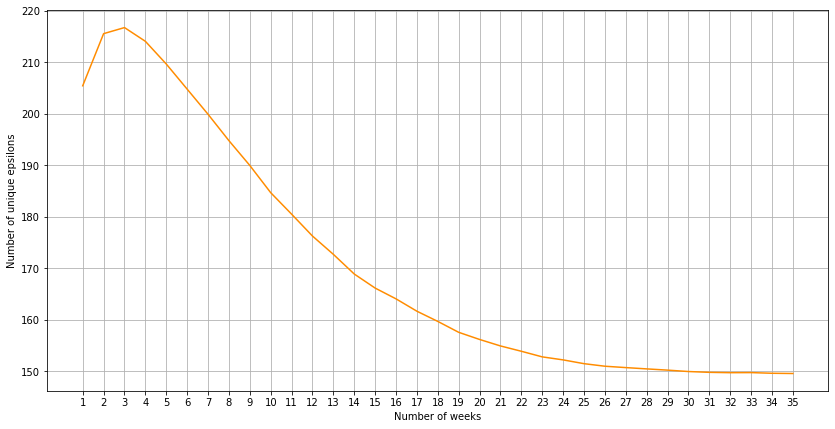


unique_epsilons
First week val: 205.424
Final week val: 149.595



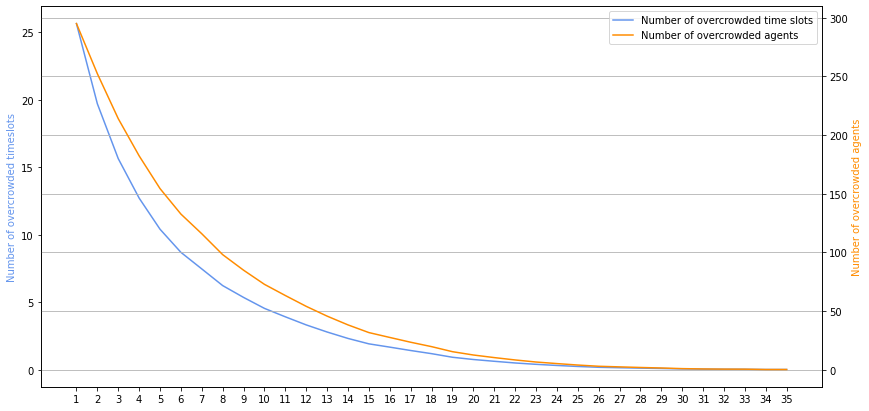

Count Swapped One Roll
81.031
221.617
Count Swapped Two Roll
44.794
114.62


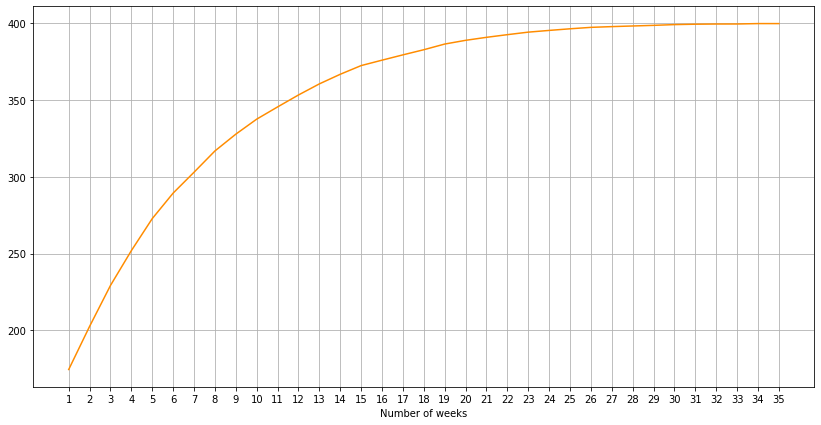


exploitation_count
First week val: 174.474
Final week val: 399.757



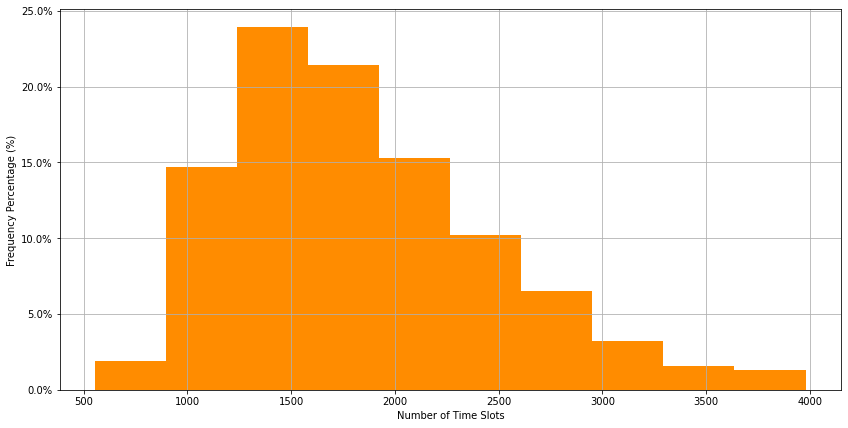

-------------------------------------------------------------------------------


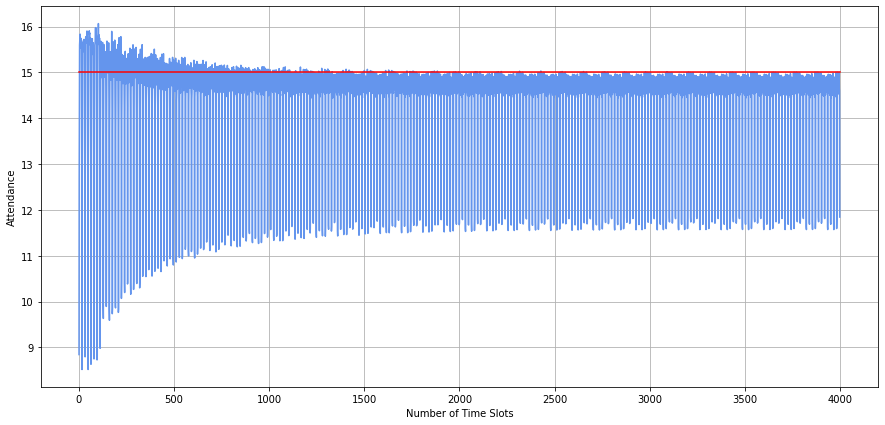

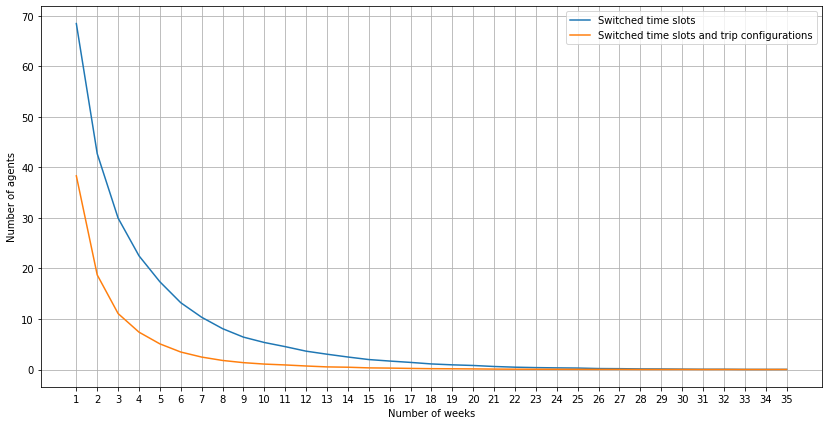


Num agents switching One roll
First week val: 68.493
Final week val: 0.024

Num agents switching two roll
First week val: 38.346
Final week val: 0.01




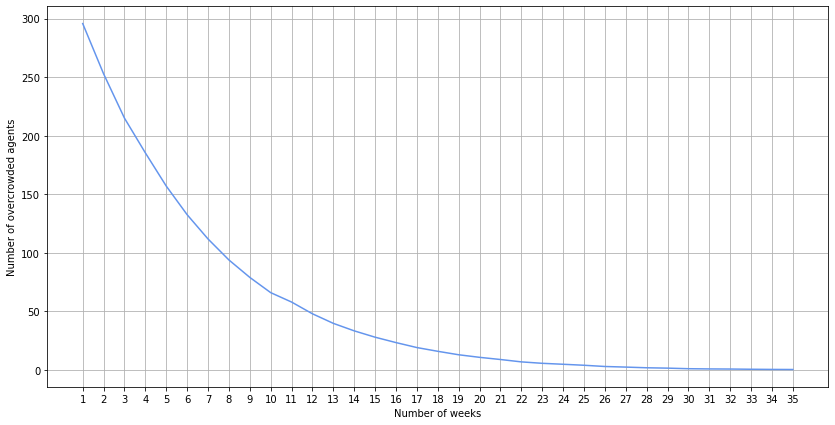


overcrowded_agent
First week val: 295.708
Final week val: 0.351



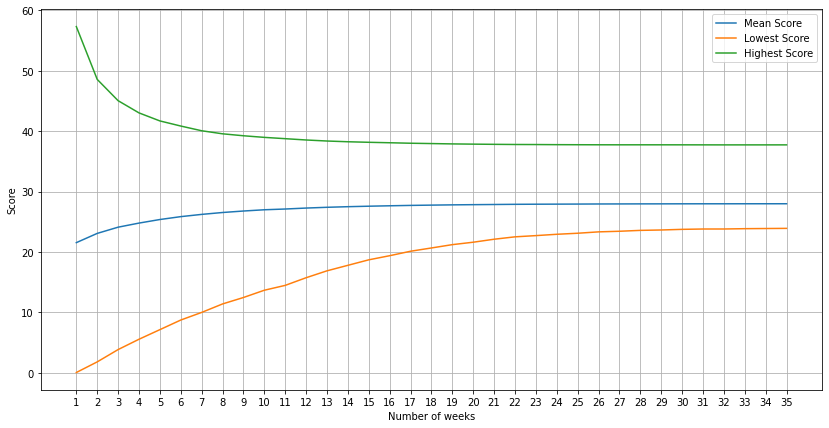


Mean Score
First week val: 21.556
Final week val: 27.995

Lowest Score
First week val: 0.05330882352941176
Final week val: 23.917937675069968

Highest Score
First week val: 57.329967858938566
Final week val: 37.74402373770021





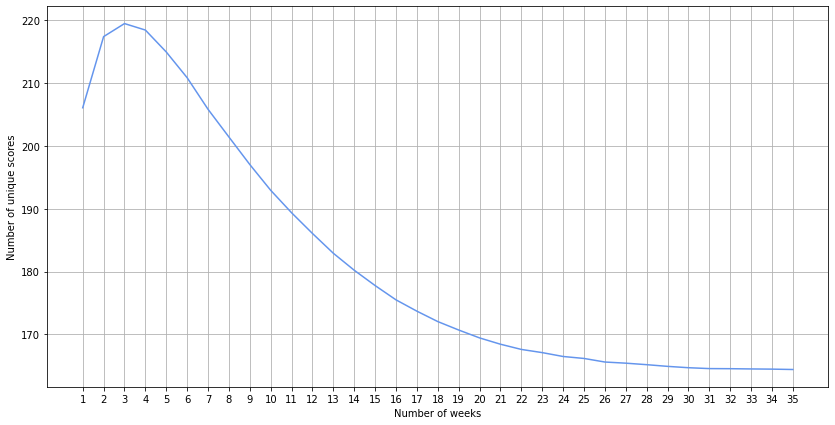


unique_scores
First week val: 206.089
Final week val: 164.398



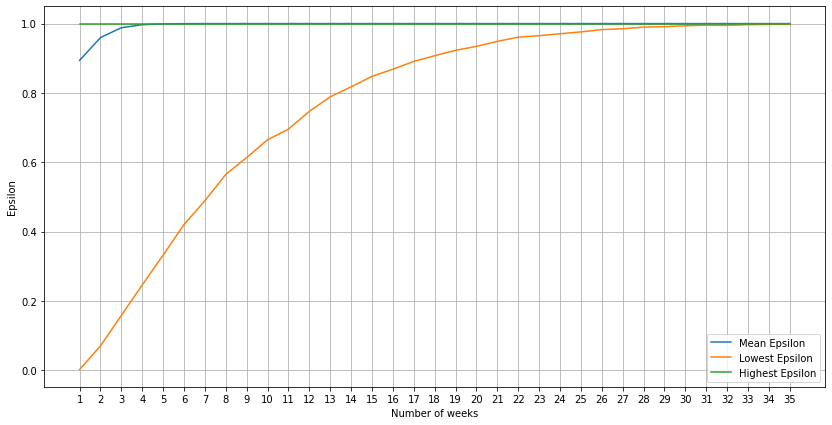


Mean Epsilon
First week val: 0.8937910822282191
Final week val: 1.0

Lowest Epsilon
First week val: 0.0020189728117199026
Final week val: 0.9981018823470659

Highest Epsilon
First week val: 1.0
Final week val: 1.0





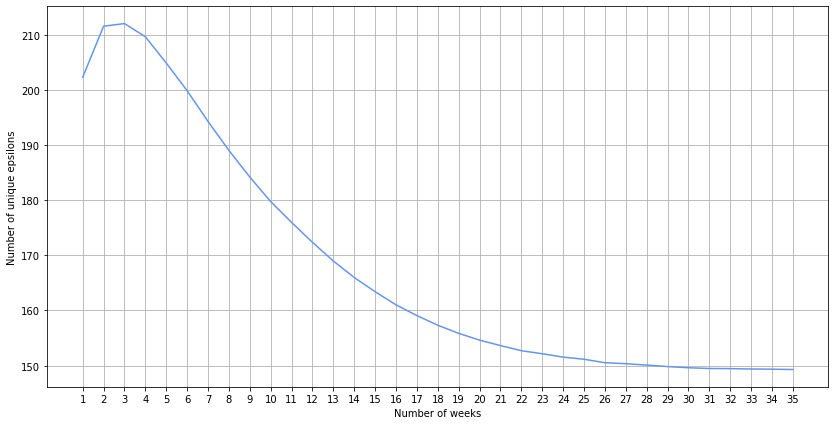


unique_epsilons
First week val: 202.291
Final week val: 149.291



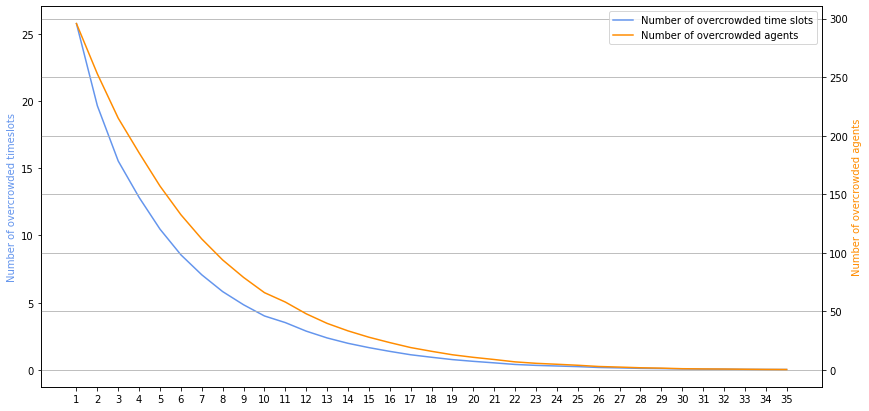

Count Swapped One Roll
68.493
177.244
Count Swapped Two Roll
38.346
83.608


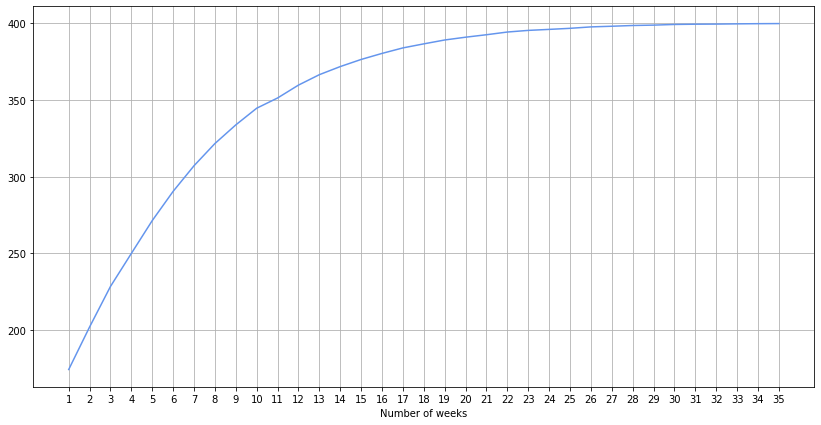


exploitation_count
First week val: 174.327
Final week val: 399.716



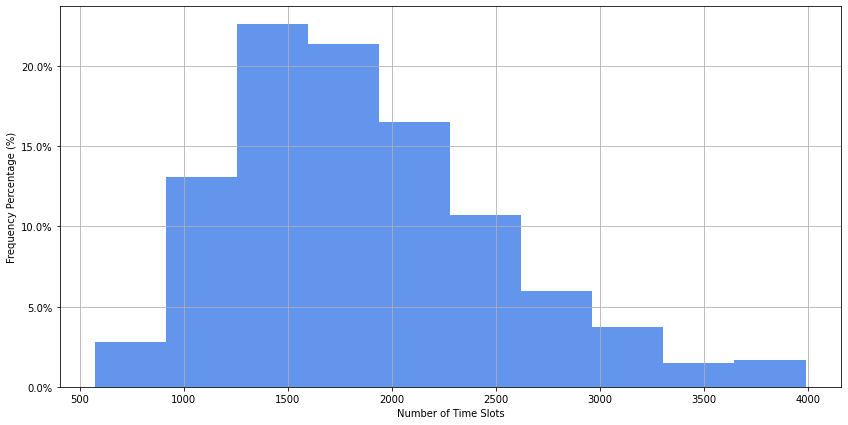

-------------------------------------------------------------------------------


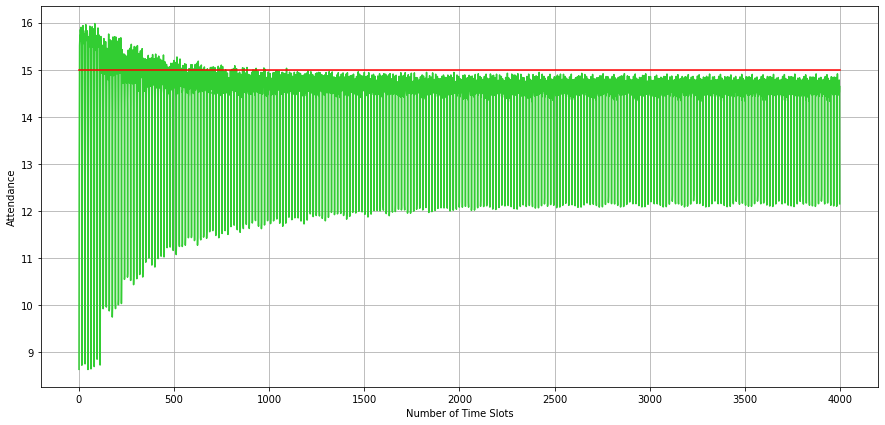

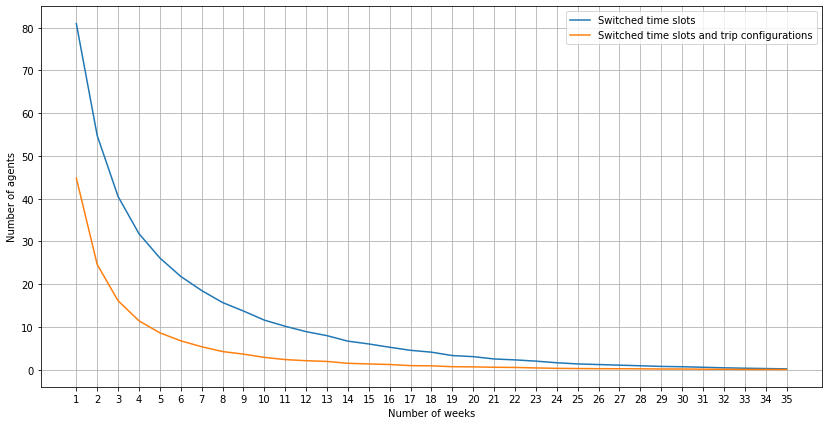


Num agents switching One roll
First week val: 80.959
Final week val: 0.188

Num agents switching two roll
First week val: 44.805
Final week val: 0.035




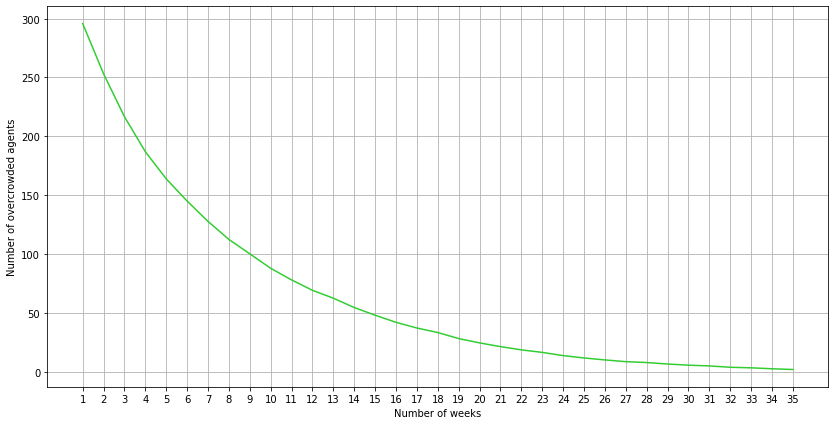


overcrowded_agent
First week val: 295.769
Final week val: 1.828



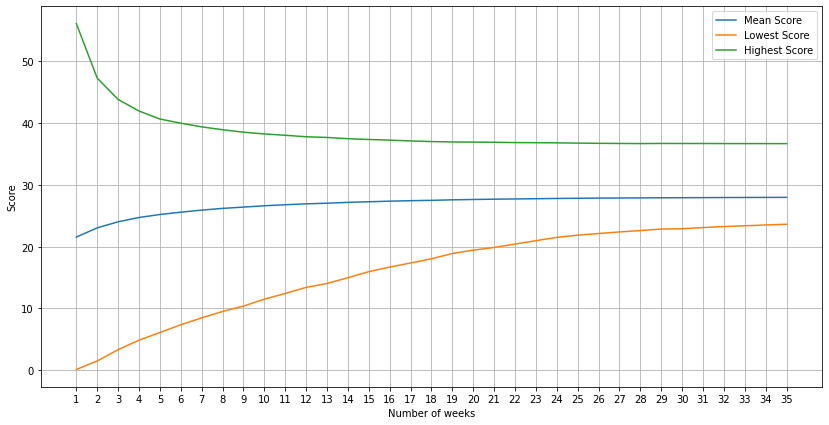


Mean Score
First week val: 21.5405
Final week val: 27.9735

Lowest Score
First week val: 0.11176470588235289
Final week val: 23.61777634130571

Highest Score
First week val: 56.09880335350925
Final week val: 36.667273739332536





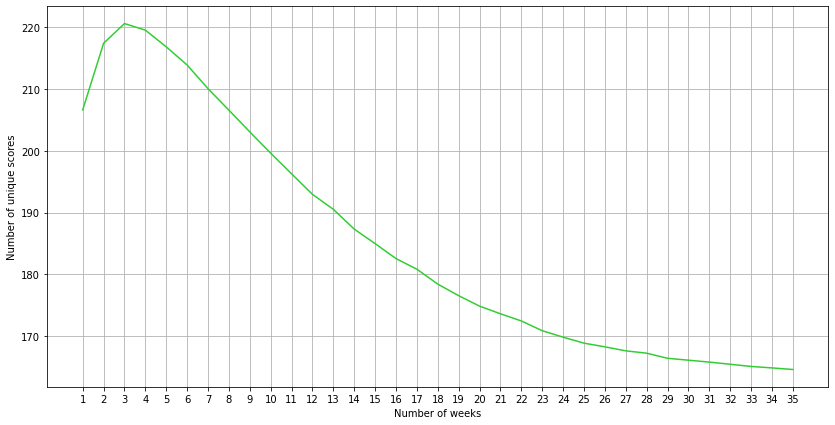


unique_scores
First week val: 206.623
Final week val: 164.607



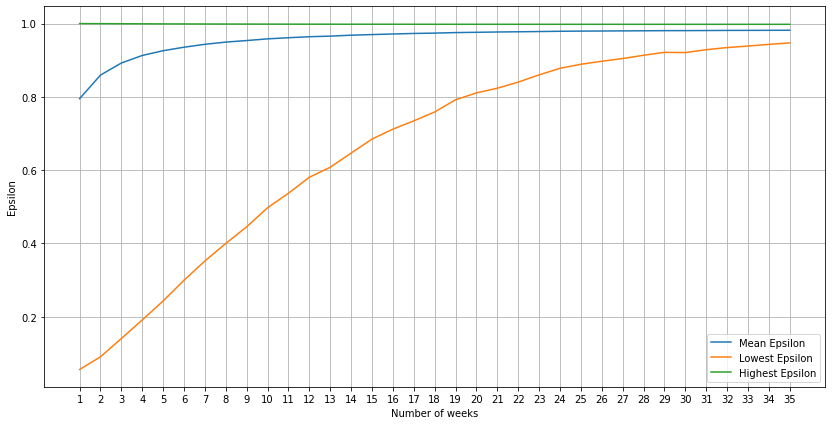


Mean Epsilon
First week val: 0.7949799026377177
Final week val: 0.9817095832649397

Lowest Epsilon
First week val: 0.05613388885386948
Final week val: 0.9472461624258318

Highest Epsilon
First week val: 0.9999313144307508
Final week val: 0.9978987409501846





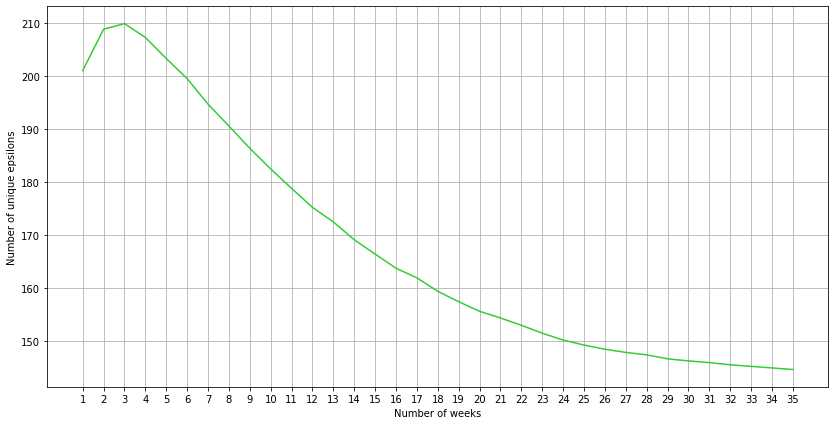


unique_epsilons
First week val: 201.064
Final week val: 144.615



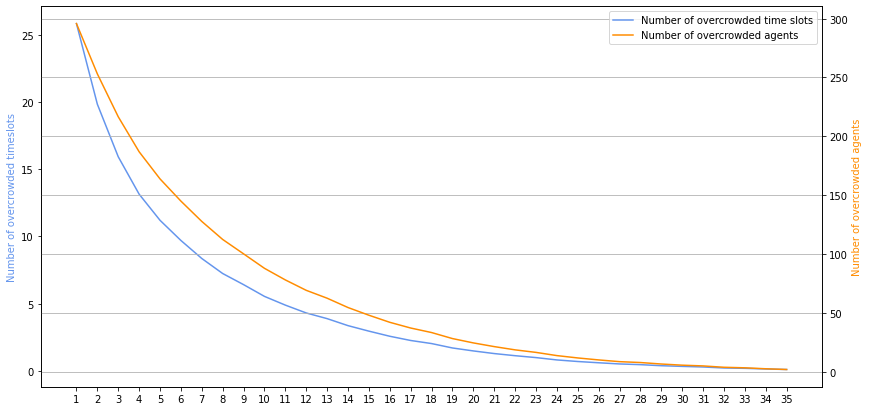

Count Swapped One Roll
80.959
236.934
Count Swapped Two Roll
44.805
119.161


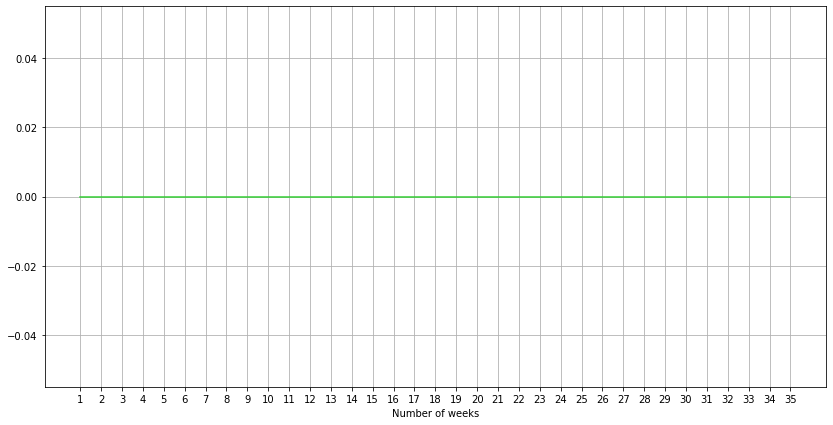


exploitation_count
First week val: 0.0
Final week val: 0.0



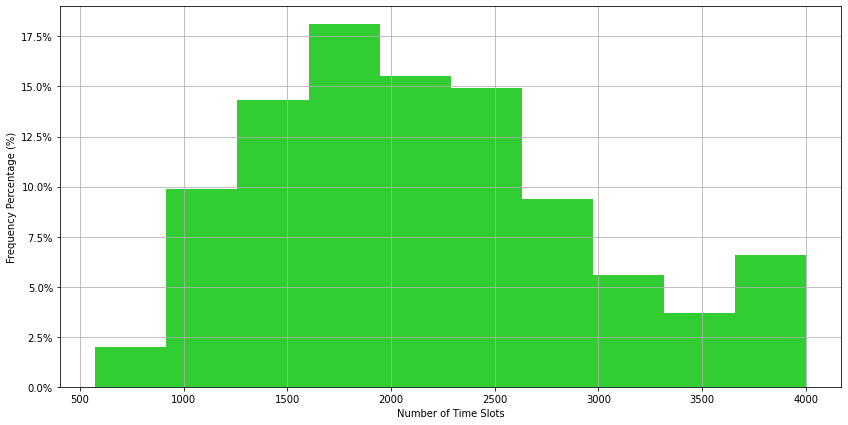

In [3]:
experiment_folders = ['base_1/', 'log_0.25/', 'sigmoid_0.25/']
#experiment_folders = ['log_0.25/']

for experiment_folder in experiment_folders:
    run_analysis(experiment_folder)

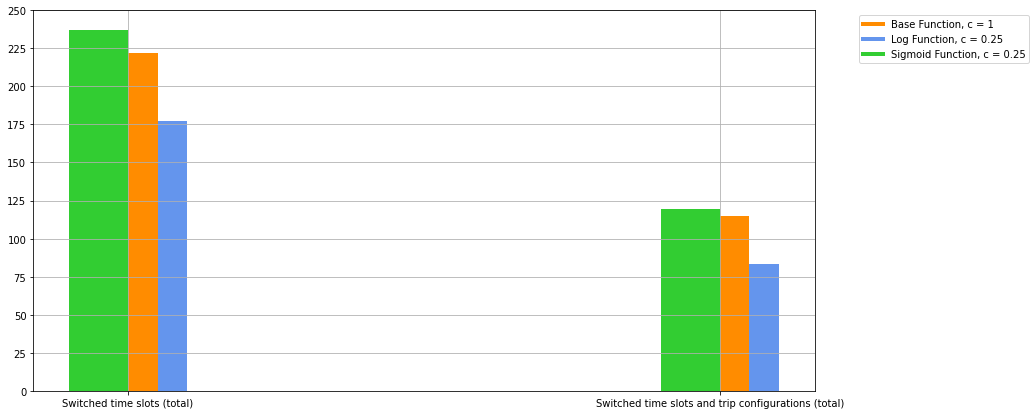

In [4]:
# Bar Plot of Count swapped one and two roll 
plt.figure(figsize = (14,7))
functions = ["Base Function, c = 1", 'Log Function, c = 0.25', 'Sigmoid Function, c = 0.25']

s_r = ["Switched time slots (total)", "Switched time slots and trip configurations (total)"]

base_metric_values = []
base_metric_values.append(graph_dict['base_1/']["count_swapped_one_roll"]["final_week_val"])
base_metric_values.append(graph_dict['base_1/']["count_swapped_two_roll"]["final_week_val"])

log_metric_values = []
log_metric_values.append(graph_dict['log_0.25/']["count_swapped_one_roll"]["final_week_val"])
log_metric_values.append(graph_dict['log_0.25/']["count_swapped_two_roll"]["final_week_val"])

sigmoid_metric_values = []
sigmoid_metric_values.append(graph_dict['sigmoid_0.25/']["count_swapped_one_roll"]["final_week_val"])
sigmoid_metric_values.append(graph_dict['sigmoid_0.25/']["count_swapped_two_roll"]["final_week_val"])


plt.bar(s_r, log_metric_values, align = 'edge', width = 0.1, color = 'cornflowerblue')

plt.bar(s_r, base_metric_values, align = 'center', width = 0.1, color='darkorange')

plt.bar(s_r, sigmoid_metric_values, align = 'edge', width = -0.1, color ='limegreen')

cmap = plt.cm.coolwarm
custom_lines = [Line2D([0], [0], color='darkorange', lw=4),
                Line2D([0], [0], color='cornflowerblue', lw=4),
                Line2D([0], [0], color='limegreen', lw=4)]

plt.legend(custom_lines, functions, bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.title("Comparison of Total Number of Agents Switching Slots at the end of the simulation")
plt.grid()
plt.yticks(range(0,275,25))
plt.savefig('s_r_all_functions.png', bbox_inches='tight')
plt.show()


Overcrowded Agent
First week val: 294.924
Final week val: 0.279


Overcrowded Agent
First week val: 295.708
Final week val: 0.351


Overcrowded Agent
First week val: 295.769
Final week val: 1.828



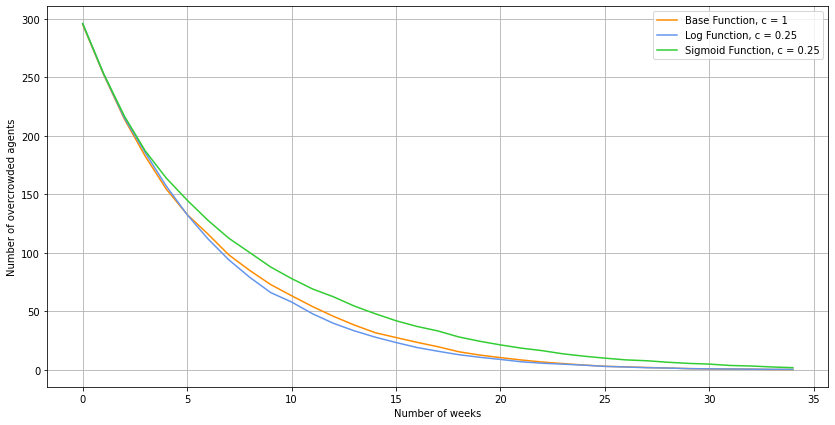

In [5]:
plt.figure(figsize = (14,7))
    
for experiment_folder in experiment_folders:
    avg_mean_score_df = pd.Series(graph_dict[experiment_folder]['overcrowded_agent']['avg_across_runs'])
    #avg_min_score_df = pd.Series(graph_dict[experiment_folder]['min_all_scores']['avg_across_runs'])
    #avg_max_score_df = pd.Series(graph_dict[experiment_folder]['max_all_scores']['avg_across_runs'])


    mean_score_week_update = []
    for i in range(113, len(avg_mean_score_df), 112):
        #print(avg_epsilon_df[i])
        mean_score_week_update.append(avg_mean_score_df[i])

    avg_mean_score_df =  pd.Series(mean_score_week_update)
    
    if "base" in experiment_folder:
        label = "Base Function, c = 1"
        color = 'darkorange'
    
    if "log" in experiment_folder:
        label = "Log Function, c = 0.25"
        color = 'cornflowerblue'
        
    if "sigmoid" in experiment_folder:
        label = "Sigmoid Function, c = 0.25"
        color = 'limegreen'
        
    plt.plot(avg_mean_score_df, label = label, color = color)

    print()
    print("Overcrowded Agent")
    print("First week val: " + str(graph_dict[experiment_folder]["overcrowded_agent"]["first_week_val"]))
    print("Final week val: " + str(graph_dict[experiment_folder]["overcrowded_agent"]["final_week_val"]))
    print()

#plt.title("Number of overcrowded agents over time averaged over all iterations for all epsilon normalization functions")
plt.xlabel("Number of weeks")
plt.ylabel("Number of overcrowded agents")
plt.legend()
plt.grid()
plt.savefig('overcrowded_agents_all_functions.png')
plt.show()


Overcrowded Timeslots
First week val: 25.637
Final week val: 0.017


Overcrowded Timeslots
First week val: 25.772
Final week val: 0.02


Overcrowded Timeslots
First week val: 25.837
Final week val: 0.106



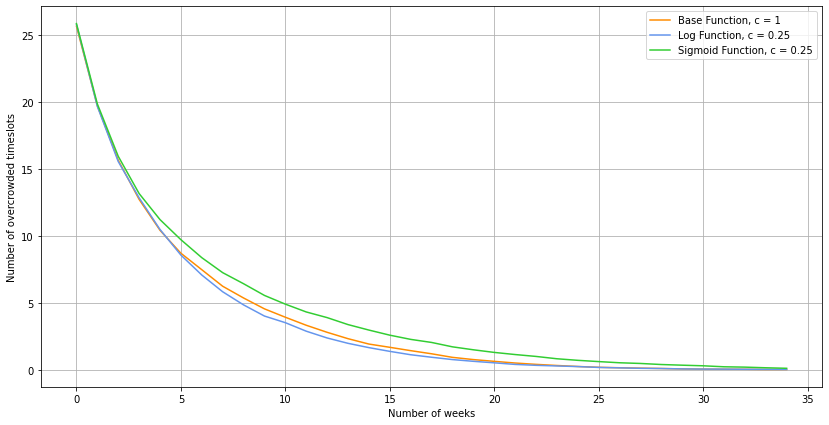

In [6]:
plt.figure(figsize = (14,7))
    
for experiment_folder in experiment_folders:
    avg_mean_score_df = pd.Series(graph_dict[experiment_folder]['num_overcrowded_timeslots']['avg_across_runs'])
    #avg_min_score_df = pd.Series(graph_dict[experiment_folder]['min_all_scores']['avg_across_runs'])
    #avg_max_score_df = pd.Series(graph_dict[experiment_folder]['max_all_scores']['avg_across_runs'])


    mean_score_week_update = []
    for i in range(113, len(avg_mean_score_df), 112):
        #print(avg_epsilon_df[i])
        mean_score_week_update.append(avg_mean_score_df[i])

    avg_mean_score_df =  pd.Series(mean_score_week_update)
    
    if "base" in experiment_folder:
        label = "Base Function, c = 1"
        color = 'darkorange'
    
    if "log" in experiment_folder:
        label = "Log Function, c = 0.25"
        color = 'cornflowerblue'
        
    if "sigmoid" in experiment_folder:
        label = "Sigmoid Function, c = 0.25"
        color = 'limegreen'
        
    plt.plot(avg_mean_score_df, label = label, color = color)

    print()
    print("Overcrowded Timeslots")
    print("First week val: " + str(graph_dict[experiment_folder]["num_overcrowded_timeslots"]["first_week_val"]))
    print("Final week val: " + str(graph_dict[experiment_folder]["num_overcrowded_timeslots"]["final_week_val"]))
    print()

#plt.title("Number of overcrowded timeslots over time averaged over all iterations for all epsilon normalization functions")
plt.xlabel("Number of weeks")
plt.ylabel("Number of overcrowded timeslots")
plt.legend()
plt.grid()
plt.savefig('overcrowded_timeslots_all_functions.png')
plt.show()

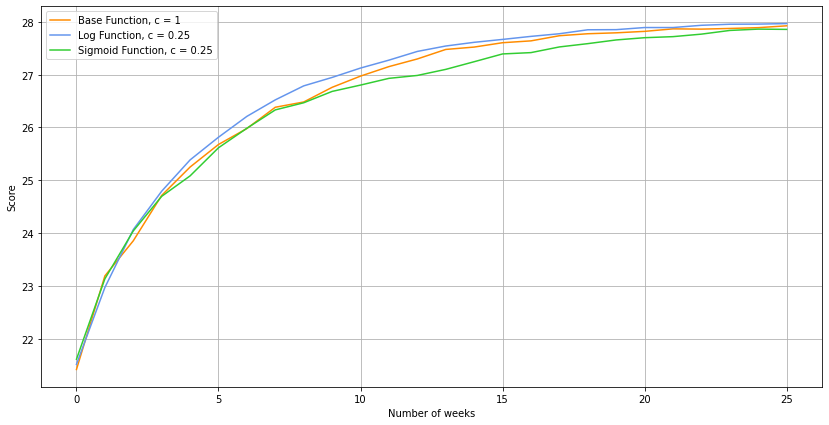

In [9]:
experiment_folders = ['base_1/', 'log_0.25/', 'sigmoid_0.25/']
avg_df = {}
for experiment_folder in experiment_folders:
    avg_df[experiment_folder] = pd.read_csv(experiment_folder+'avg_scores.csv')
    
plt.figure(figsize = (14,7))
    
for experiment_folder in experiment_folders:
    
    if "base" in experiment_folder:
        label = "Base Function, c = 1"
        color = 'darkorange'
    
    if "log" in experiment_folder:
        label = "Log Function, c = 0.25"
        color = 'cornflowerblue'
        
    if "sigmoid" in experiment_folder:
        label = "Sigmoid Function, c = 0.25"
        color = 'limegreen'
        
    plt.plot(avg_df[experiment_folder]['0'], label = label, color = color)

#plt.title("Mean Scores averaged over all iterations for all epsilon normalization functions")
plt.xlabel("Number of weeks")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.savefig('scores_all_functions.png')
plt.show()

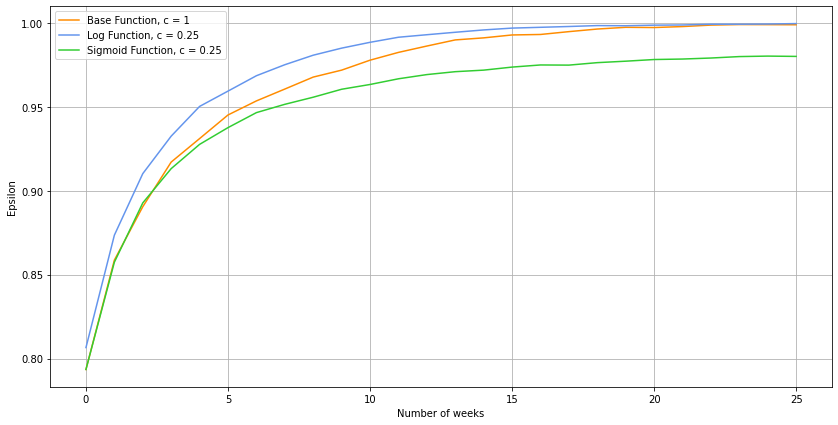

In [10]:
experiment_folders = ['base_1/', 'log_0.25/', 'sigmoid_0.25/']
avg_df = {}
for experiment_folder in experiment_folders:
    avg_df[experiment_folder] = pd.read_csv(experiment_folder+'avg_epsilons.csv')
    
plt.figure(figsize = (14,7))
    
for experiment_folder in experiment_folders:
    
    if "base" in experiment_folder:
        label = "Base Function, c = 1"
        color = 'darkorange'
    
    if "log" in experiment_folder:
        label = "Log Function, c = 0.25"
        color = 'cornflowerblue'
        
    if "sigmoid" in experiment_folder:
        label = "Sigmoid Function, c = 0.25"
        color = 'limegreen'
        
    plt.plot(avg_df[experiment_folder]['0'], label = label, color = color)

#plt.title("Mean Epsilons averaged over all iterations for all epsilon normalization functions")
plt.xlabel("Number of weeks")
plt.ylabel("Epsilon")
plt.legend()
plt.grid()
plt.savefig('epsilons_all_functions.png')
plt.show()